# 8 機械学習の基礎

- **[8.1 機械学習の全体像](#8.1-機械学習の全体像)**
    - [8.1.1 機械学習とは？](#8.1.1-機械学習とは？)
    - [8.1.2 教師あり学習](#8.1.2-教師あり学習)
    - [8.1.3 教師なし学習](#8.1.3-教師なし学習)
    - [8.1.4 強化学習](#8.1.4-強化学習)
<br><br>
- **[8.2 教師あり学習](#8.2-教師あり学習)** 
    - [8.2.1 重回帰分析](#8.2.1-重回帰分析)
    - [8.2.2 ロジスティック回帰分析](#8.2.2-ロジスティック回帰分析)
    - [8.2.3 正則化、ラッソ回帰、リッジ回帰](#8.2.3-正則化、ラッソ回帰、リッジ回帰)
    - [8.2.4 決定木](#8.2.4-決定木)
    - [8.2.5 k-NN](#8.2.5-k-NN)
    - [8.2.6 サポートベクターマシン](#8.2.6-サポートベクターマシン)
<br><br> 
- **[8.3 教師なし学習](#8.3-教師なし学習)** 
    - [8.3.1 クラスタリング(クラスター分析）](#8.3.1-クラスタリング)
    - [8.3.2 次元圧縮（主成分分析）](#8.3.2-次元圧縮)
    - [8.3.3 バスケット分析とアソシエーションルール](#8.3.3-バスケット分析とアソシエーションルール)
<br><br>
- **[8.4 総合問題](#8.4-総合問題)**
    - [8.4.1 総合問題1](#8.4.1-総合問題1)
    - [8.4.2 総合問題2](#8.4.2-総合問題2)

## 8.1 機械学習の全体像
ゴール：機械学習の各アプローチ（教師あり学習、教師なし学習）と概要を知ること

In [2]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

### 8.1.1 機械学習とは？
キーワード：機械学習、教師あり学習、教師なし学習、強化学習

いよいよここから機械学習の章になります。これまで様々なデータを見てきました。そのデータの中から、モデルを構築し、ある値を予測をしたりグループ分けしたりするのが**機械学習**です。機械学習は主に3つに分けられることが多く、**教師あり学習(supervised learning)**、**教師なし学習(unsupervised learning)**、**強化学習(reinforcement learning)**です。

目的がはっきりしている場合は教師あり学習で、目的型学習とも言われます。訓練データ（学習データ）があり、そこから目的の変数（アウトプット）を予測するために説明変数を使ってモデルを構築する方法です。一方、目的がなく、データの構造から傾向を見る方法を教師なし学習といいます。ゴールがはっきりしておらずある程度、試行錯誤しながらするやり方で、探索型のデータ分析とも言われます。3つ目の強化学習も最近注目されており、面白い分野なのでが、ここでは紹介するだけにとどめ、主に教師あり学習と教師なし学習を中心に学んでいきます。

以下は、教師あり学習と教師なし学習のイメージです。左図が教師あり学習で、あらかじめラベル付け（以下は丸とバツ）がされていて、丸とバツに分けたいというモチベーションがあり、右図が教師なし学習で、ラベル付けは特にされておらず、与えられたデータ構造からインサイト（以下の赤丸に囲まれているグループができそうだ）を見つけ出していきます。

![](http://oliviaklose.azurewebsites.net/content/images/2015/02/2-supervised-vs-unsupervised-1.png)

参照URL:http://oliviaklose.azurewebsites.net/content/images/2015/02/2-supervised-vs-unsupervised-1.png

なお、今回の章で扱うデータ分析は、いきなり機械学習を適応するところから始めます。簡単に機械学習を使えることを体感していただきたいからです。ただし、本場でデータ分析をするときには、どんなデータがあるのか細かくチェックしたり、基本統計量やヒストグラム、散布図の作成など、探索的にデータを観察することは必ず実施してください。そういった簡単なデータ探索から色々なことがわかったりすることがあるからです。ビジネスの現場で、無理に機械学習をあてはめる必要はありません。もちろん、そこから有益な示唆や収益源が見つかることもありますので、その時には実装してください。

>**[ポイント]**

>現場でデータ分析をするときは、機械学習を適応する前に、基本統計量や散布図を作成し、データの傾向や全体像を抑えましょう。

参考ですが、機械学習の易しめの本としては、以下の文献やURLが参考になりますので、この章の良い予習・復習になります。

>[参考文献]

>『Pythonによる機械学習入門』（株式会社システム計画研究所 (編集)、オーム社）

>『ゼロからはじめるデータサイエンス ―Pythonで学ぶ基本と実践』（Joel Grus (著), 菊池 彰 (翻訳)、O'REILLY）

>『Introduction to Machine Learning with Python』（Andreas C.Muller & Sarah Guido、O'REILLY）

>[参考URL]

>https://github.com/jakevdp/PythonDataScienceHandbook

また、この章では主に、Pythonのscikit-learnを使います。1章でも回帰分析の箇所で少し使いました。以下のサイトに詳細な情報や使い方がありますので、この講座が終わった後は是非読んでみてください。

>[参考URL]

>http://scikit-learn.org/stable/index.html

### 8.1.2 教師あり学習
キーワード：目的変数、説明変数、回帰、分類

まずは簡単に教師あり学習について紹介します。先ほど説明したように、あらかじめ教師データと言われる見本が与えられており、それをベースにモデルを構築します。データのカラム（変数）について、ゴールとなる予測したい変数のことを**目的変数**と言います。他の名称としては、応答変数、ターゲット変数、従属変数とも言われます。関数y=f(x)でいうところのyにあたります。一方、その目的変数を説明するための変数(x)のことを**説明変数**と言います。他には予測変数だったり、独立変数と言われることもあります。具体的には、ある消費財の購買者が離反するかどうか（目的変数）を予測したい時に、過去の色々なデータ（属性、購買頻度、関連商品の購入など）を説明変数としてモデリングします。

目的変数については、数値の場合だったり、どのグループに属するのか予測したい場合があります。数値の場合は**回帰**、何かのグループに分ける時どのグループに属するのか分けるのが**分類**といいます。この講座ではどちらのデータも扱っていきます。手法としては、**重回帰分析、ロジスティック回帰分析、k近傍法、決定木、サポートベクターマシン、ランダムフォレスト**等があります。

なお、目的にもよりますが、企業ビジネスの現場では、重回帰分析、ロジスティック回帰分析、決定木がメインで使われます。サポートベクターマシンなどは説明がしにくく、一般の人が1回聞いてすぐに理解出来る手法ではありません（さらに、機械学習で「決定木」は理解しやすいという記載が多々ありますが、これもなかなか一般の人が聞いてすぐに理解出来る概念ではないです）。また後で検証結果をお見せしますが、いろいろな手法を使っても予測精度などはそれほど大きくは変わらないことも多々あります。そのため、第3者にとって理解がしやすく、アクションを実施しやすいものを選んだ方が良いです。ただ、その予測精度が1％改善するだけで、ビジネスインパクトが大きいのであれば、話は別になります。ケースバイケースで判断して使ってください。

### 8.1.3 教師なし学習
キーワード：クラスタリング、主成分分析、アソシエーションルール

次は、教師なし学習です。教師なし学習は、見本（インプットとアウトプットの関係）を与えられておらず、目的がはっきりしていないケースを扱います。与えられた情報をインプットとして、クラス分けをします。そのデータ構造を調べることで、意味のある情報を取り出します。主な手法としては、**クラスター分析（クラスタリング）**があります。実務的な利用方法としては、ある消費者がどんなグループに分かれるのか（**セグメンテーション**）など、マーケティング分析を実施する時によく使われます。他、過去の事例が役に立たない場合（詐欺行為、異常値発見など）にも使われたります。なお、先ほどの分類と似たような言葉なのですが、分類はあくまで目的がありますので、ここではあくまでターゲットがわからないケースを想定します。

なお、クラスタリングは、目的となる変数が設定されていないため、探索的なデータ分析でもあります。セグメンテーションなどでグルーピングをしたら終わりではなく、そこから深堀をしたり、現場の感覚とズレがないかなど見ていく必要があります。計算はすぐにできますが、その後の利用方法や解釈は、直感的なアプローチも必要です。完全には自動化できず、人の判断が重要な役割を担ってきます。

他の教師なし学習としては、**主成分分析（次元圧縮）**、**アソシエーションルール**などがあります。主成分分析は、変数が多い時に、それらの情報を凝縮して、変数を減らす方法です。アソシエーションルールはPOS（Point of Sales）といわれる購買データ等の分析に使われ、ある商品Aを買っている人はある商品Bも買っていることが多いというのが、このアプローチからわかったりします。

以下の参考文献では、おおまかではありますが、教師あり学習を「目的志向的データマイニング」、教師なし学習を「探索的データマイニング」としており、ビジネスの現場でどのように機械学習（やデータマイニング）を使っていけば良いか記載されています。ビジネス視点でこの講座を活かさせたい場合はオススメです。なお、上2つは翻訳本で、原書の一部分がカットされていますので、英語が読める方は原書が良いでしょう。

>[参考文献]

>『データマイニング手法 予測・スコアリング編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 江原 淳 (翻訳), 上野 勉 (翻訳), & 2 その他、海文堂出版）

>『データマイニング手法 探索的知識発見編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 江原 淳 (翻訳), 上野 勉 (翻訳), & 2 その他、海文堂出版）

>『Data Mining Techniques: For Marketing, Sales, and Customer Relationship Management 』（Gordon S. Linoff (著), Michael J. A. Berry (著),Wiley）

### 8.1.4 強化学習
キーワード：動的計画法、モンテカルロ法、TD学習、OpenAI

強化学習とは、ある報酬を最大化するために、何をすべきかを学習します。教師あり学習のように、最適な出力等は教えられず、その代わり、どのような行動を取ったら、より大きな報酬を得られるかを見つけ出します。環境が与えられて、その中から学習をしていきます。具体的なイメージとしては、赤ちゃんは歩き方を教わっていないのに、そのおかれている環境の中から試行錯誤しながら歩けるようになるというイメージです。

教師あり学習との違いは、探索的に行動し、相互作用の中から学んでいくという点です。探索と知識利用の間のトレードオフをどのように扱うかがこの強化学習のテーマでもあります。

強化学習の主なアプローチとしては、動的計画法、モンテカルロ法やTD学習などがあります。動的計画法は、明示的な知識があることを仮定しています。一方、モンテカルロ法は、環境における完全な知識を必要とせず、経験のみを必要とする方法です。TD学習は、最適問題を反復計算により数値的に解く方法の1つで、本講座の8章で学ぶ勾配法の考え方に基づいています。

この講座では強化学習の紹介のみで終わりになりますが、興味のある方は、以下の参考文献やOpenAIのサイトなどを見てください。

>[参考文献]

>『強化学習』（Richard S. Sutton and Andrew G.Barto、三上・皆川共訳、森北出版株式会社）



>[参考URL]

>https://gym.openai.com

## 8.2 教師あり学習
ゴール：重回帰分析、ロジスティック回帰分析、決定木、サポートベクターマシン、k-NN法、正則化やリッジ回帰を理解して、実装できること

### 8.2.1 重回帰分析
キーワード：目的変数、説明変数、多重共線性、変数選択法

ここでは重回帰分析について学びます。1章の最後の方に単回帰分析について学びました。目的変数に対して、説明変数は1つで、sklearnを使ってモデルを構築しました。この考え方を広げて、目的変数に影響を与えている説明変数は1つではなく複数あるのではないかと考えるのが重回帰分析です。

具体的なデータを使って、この重回帰分析を使ってみます。まずは、自動車の価格データとそれらの属性（自動車の大きさなど）データをウェブ上から取得しましょう。目的としては、この自動車の価格を予測するモデルを構築します。

In [3]:
# 自動車価格データの取得
import requests, zipfile
from io import StringIO
import io

# url 
auto_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
s = requests.get(auto_data_url).content
auto_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
auto_data.columns =["symboling","normalized-losses","make","fuel-type"
                     ,"aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length"
                   ,"width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system"
                    ,"bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

いつも通り、簡単にデータを見てみましょう。head()を使いました。よくみてみると、このデータの中に?があるため、このままではモデリングがやりくいです。

In [4]:
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


今回の目的はpriceを予測することなので、このpriceにある?データは削除してしまいましょう。pandasで学んだテクニックを使います。また、説明変数はhorsepower、width、heightの3つを使うことにしましょう。

In [5]:
# それぞれのカラムに ? が何個あるかカウント(確認)
for col_name in auto_data.columns:
    print(col_name,sum(auto_data[col_name].isin(['?'])))

symboling 0
normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
wheel-base 0
length 0
width 0
height 0
curb-weight 0
engine-type 0
num-of-cylinders 0
engine-size 0
fuel-system 0
bore 4
stroke 4
compression-ratio 0
horsepower 2
peak-rpm 2
city-mpg 0
highway-mpg 0
price 4


priceの他にもhorsepowerに?があるので、除外します。

In [6]:
sub_auto_data = auto_data[["price","horsepower","width","height"]]
sub_auto_data = sub_auto_data.replace('?', np.nan).dropna()

また、扱う変数が数値ではないため、数値に変換をします。

In [7]:
sub_auto_data = sub_auto_data.assign(price=pd.to_numeric(sub_auto_data.price))
sub_auto_data = sub_auto_data.assign(horsepower=pd.to_numeric(sub_auto_data.horsepower))
sub_auto_data.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


なお、簡単ですが、各変数の相関行列を見てみましょう。priceは今回の目的変数なので、それ以外の3つの変数に注目をすると、widthとhorsepowerが若干相関係数が高めに出ています。なぜこのようなチェックをしているかというと、**多重共線性**という現象が生じるからです。同じような（相関の強い）説明変数をモデルに投入しても、モデルの説明力が上がるわけではなく、むしろノイズに敏感になってしまい、モデルが不安定になります。通常、同じような変数からは、代表とする変数のみモデルに使用します。

In [12]:
sub_auto_data.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


それでは、早速、モデリングをしてみましょう。なお、ここでcross_validationのモジュールを使って、モデリングを構築する時に、学習データとテストデータに分けて、モデルスコアをチェックしています。簡単に言うと、モデルの汎化能力を確かめるためのアプローチで、作ったモデルをチェックするために、あらかじめテストデータを抜いておきます。詳しいことは次の9章で学びます。また、random_stateを固定し再現性を持たせておくって実務上は大事なので、random_state=0と設定しています（以後、基本的に固定します）。

In [26]:
from sklearn.model_selection import train_test_split

# モデル
from sklearn import linear_model

# モデルのインスタンス
l_model = linear_model.LinearRegression()
 
# 説明変数に "price" 以外を利用
X = sub_auto_data.drop("price", axis=1)

# 目的変数
Y = sub_auto_data["price"]

# データの分割（学習データとテストデータ分ける）
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,random_state=0)

# モデルのあてはめ
clf = l_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
 
# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 
print(clf.intercept_)

train: LinearRegression 0.73335756839
test: LinearRegression 0.737068873813
   Coefficients        Name
0     81.651078  horsepower
2    229.510077      height
1   1829.174506       width
-128409.046303


決定係数はtrain(学習データ)で73%、test(テストデータ)で73%という結果なので、モデルが過学習に陥ってはいないようです。

なお、他のモジュールですが、statsmodelsも重回帰分析等が計算できます。統計フリーソフトウェアのR言語を使い慣れている方は、以下のような表示に見慣れていると思いますので、参考に記載します。（なお、以下は訓練データとテストデータには分けず、モデルをそのまま適応しています。）

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
results = smf.ols('price ~ horsepower+width+height', data=sub_auto_data).fit()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 03 May 2017   Prob (F-statistic):           3.28e-61
Time:                        19:35:56   Log-Likelihood:                -1925.3
No. Observations:                 199   AIC:                             3859.
Df Residuals:                     195   BIC:                             3872.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.041e+05   1.05e+04     -9.919      0.000     -1.25e+05 -8.34e+04
horsepower   125.4389     10.055     12.476      0.000       105.609   145.269
width       1391.1852    187.367      7.425      0.000      1021.659  1760.712
height       237.2959    127.905      1.855      0.065       -14.959   489.550
==============================================================================
Omnibus:                       32.318   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.916
Skew:                           0.901   Prob(JB):                     1.45e-11
Kurtosis:                       4.666   Cond. No.                     5.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

heightのp-valueが有意水準を5%とした場合、若干上回っていますが、そこまで高い数値ではないので、その場の状況において判断しましょう。p値（p-value）が小さいと、その説明変数は確率論的にモデルの説明力に寄与していると言えますが、決定係数やデータ自体に対する知見を持って総合的に判断することが重要です。

なお、ここではモデリングする際に変数をhorsepower、width、heightに決めて実装しました。この時に、「なんでこれらの変数なのか」思われるのは自然で、変数を選択するための方法もいくつかあります。具体的には、**変数増加法（前進的選択法）**、**変数減少法（後退的選択法）**、**ステップワイズ法**など、また選択するための規準（RMSE（Root Mean Squared Error）、赤池情報量規準（AIC）、ベイズ情報量規準（BIC）など）があります。

もちろん、これらも絶対的にこの方法が有効という基準はなく、データの予測精度だったり、ビジネス的な理由である変数を入れる必要があったりします。上の方法については詳細はここでは述べませんが、興味のある方は調べてみてください。

>**[やってみよう]**

>上の変数選択法や情報量規準について調べてみましょう。どのような方法で、それぞれどんな特徴がありますか。

####  <練習問題 1>
上記のデータを使って、目的変数は同じpriceで、説明変数lengthとengine-sizeを使って、重回帰分析をしてみましょう。ただし、学習データとテストデータが半分になるように分けてモデリングして、テストデータでスコアを求めてください。なお、学習データとテストデータ分けるメソッドのrandom_stateは0に設定して実施してください。

### 8.2.2 ロジスティック回帰分析
キーワード：ロジスティック回帰分析

先ほどの重回帰分析は目的変数が連続数値で、その数値の予測を実施しました。次は、予測したい変数が連続数値ではなく、例えば、ある商品を買うか買わないか、ある会社が倒産するかしないか等を予測したいケースについて考えてみます。このようにあるグループに属するかどうかというのを確率を計算するアプローチがロジスティック回帰分析です。

次のデータで収入が50K を超えるかどうかを目的変数として、モデリングしてみましょう。まずは、以下のようにデータを取得し、カラム名を設定します。

In [35]:
# データの取得
import requests, zipfile
from io import StringIO
import io

# url 
adult_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
s=requests.get(adult_data_url).content
adult_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
adult_data.columns =["age","workclass","fnlwgt","education"
                     ,"education-num","marital-status","occupation"
                     ,"relationship","race","sex","capital-gain"
                     ,"capital-loss","hours-per-week","native-country","flg-50K"]

いつもと同じようにどんなデータがあるか眺めてみましょう。

In [37]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
flg-50K           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


目的変数は「flg-50K」になります。このままでは若干扱いにくいので、フラグを立てることにしましょう。

In [96]:
adult_data.groupby("flg-50K").size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

記号の「>50K」を1として、それ以外は0とします。lambda関数を使いましょう。

In [38]:
# 目的変数：flg立てをする
adult_data["fin_flg"] = adult_data["flg-50K"].map(lambda x: 1 if x ==' >50K' else 0)

念のため上の集計結果と同じデータであることをチェックしています。

In [100]:
adult_data.groupby("fin_flg").size()

fin_flg
0    24720
1     7841
dtype: int64

いよいよモデリングです。説明変数としては、"age","fnlwgt","education-num","capital-gain","capital-loss"を使うことにしましょう。また、ロジスティック回帰はLogisticRegressionを使います。

In [41]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数
X = adult_data[["age","fnlwgt","education-num","capital-gain","capital-loss"]]
Y = adult_data['fin_flg']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

# ロジスティック回帰のインスタンス
model = LogisticRegression()
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

train result: 0.797379197379
test result: 0.794988330672


なお、特徴量(ここではX)の標準化を実施してみます。以下の結果を見てみると、スコア（正解率）が上がっています。標準化とは、スケーリングの一種で、それぞれの変数のスケールを合わせます。このように特徴量の尺度を揃えることで、機械学習のアルゴリズムがうまく動作します。ただし、後から述べる決定木等は単なる大小比較のため、変わりません。

In [42]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 説明変数と目的変数
X = adult_data[["age","fnlwgt","education-num","capital-gain","capital-loss"]]
Y = adult_data['fin_flg']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

# ロジスティック回帰
model = LogisticRegression()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.score(X_train_std,y_train))
print("test:", clf.score(X_test_std,y_test))

train: 0.810483210483
test: 0.809974204643


####  <練習問題 1>
sklearn.datasetsのload_breast_cancerを読み込んで、目的変数をcancer.targetとして、cancer.dataを説明変数にロジスティック回帰で予測モデルを構築してください。この時、訓練データとテストデータに分けるtrain_test_split（random_state=0）を使って、テストデータにおけるスコアを求めてください。ただし、変数は標準化してください。

### 8.2.3 正則化、ラッソ回帰、リッジ回帰
キーワード：正則化、ラッソ回帰、リッジ回帰

複雑なモデルを作れば、今持っているデータにマッチするモデルはできるかもしれません。しかし、重要なのはモデルの汎化能力です。ここでは、モデルをシンプルにしたとき、今持っているデータだけでなく、未知のデータをうまく予測できることを考えます。

1章で最小2乗法で誤差を考えましたが、そこにこのモデルの複雑さを表す式を加えます。この場合、複雑なモデルであればあるほどペナルティを与えられ、これを**正則化**といいます。またその正則化項は以下のようになり、q=1の時はラッソ回帰、q=2の時はリッジ回帰と言います。（M：変数の数、w：重み付け（係数）、λ：正則化パラメータ）

\begin{eqnarray}
\lambda\sum^M_{j=1} |w_{j}|^q
\end{eqnarray}

重回帰、ロジスティック回帰が、投入する説明変数の多さによってモデルの複雑性を調整するのに対し、ラッソ回帰、リッジ回帰はパラメータ自体の大きさを小さく抑えることによってモデルの複雑性を調整するアプローチと考えることができます。モデルをシンプルにすることで、トレーニングスコアとテストスコアに乖離がある場合、改善されることがあります。

ここでは、普通の線形回帰とリッジ回帰を見てみます。モジュールはlinear_modelで、リッジ回帰はRidgeを使います。

In [270]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target)

# 普通の線形回帰
model_linear = linear_model.LinearRegression()
# リッジ回帰
model_ridge = linear_model.Ridge()


for model in [model_linear,model_ridge]:
    clf = model.fit(X_train,y_train)
    print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: LinearRegression 0.782686854362
test: LinearRegression 0.719716283547
train: Ridge 0.742025513043
test: Ridge 0.740765900204


上の結果から、訓練データは普通の線形回帰がスコアが良くなっていますが、テストデータはリッジ回帰が良くなっているのがわかります。

### 8.2.4 決定木
キーワード：決定木、分類木、回帰木、エントロピー、情報利得、ジニ不純度、分類誤差

ここで扱っていくデータはキノコのデータです。キノコには食用キノコとそうでないもの（毒キノコ）がありますが、今回の目的は、このキノコが食用かどうかを見分けることです。仮に、無人島などにおかれてキノコしかないときには、命に関わる切実な問題になりますので、必死に考えていきましょう。さて、キノコの属性として色々なデータがあります。カサの形、匂い、ヒダの大きさなどです。今回扱うデータには、それらの属性データが20種類以上もあります。この属性データから、例えば、かさの形が円錐形かそうでないかで、ヒダの色が黒色なのか赤色なのか、その大きさは大きいのか小さいのか、というように条件分岐をしていき、最終的にそのキノコが毒かそうでないかを見分けます。

![](http://www.prairiemushrooms.com/files/styles/banner_image_view_masthead_block/public/banner/image/Banner_Image_-_Various_Mushrooms.jpg?itok=Ka6WfrJa)

参照URL:http://www.prairiemushrooms.com/files/styles/banner_image_view_masthead_block/public/banner/image/Banner_Image_-_Various_Mushrooms.jpg?itok=Ka6WfrJa

このように、データが与えられた時に、ある目的（今回は毒キノコかそうでないか、他の活用例は購買するかどうかなど）に到達するために、各属性の条件分岐をして、グループに分けていく方法を**決定木**といいます。目的に辿りつくのにいろいろなルートがあり、それがツリー状になっているために決定木といいます。さらに、この決定木は、目的となる変数がグループ分けの場合は**分類木**といいますが、連続値である場合も使うことができて、それを**回帰木**といいます。

参照URL：http://blogs.teradata.com/international/ja/hhg14/

ビジネスの現場としては、マーケティングの分野で、ある商品を購買をする人がどのような属性を持っているのか(
女性なのか男性なのか、年収は平均以上かそうでないか、別の商品を買っているかどうかなど)、いろいろと条件分岐ができ、**セグメンテーション**のアプローチにも使われたります。

それでは、早速このキノコデータを読み込んでみましょう。

In [45]:
# きのこデータの取得
import requests, zipfile
from io import StringIO
import io
import pandas as pd

# url 
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s=requests.get(mush_data_url).content

mush_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

mush_data.columns =["classes","cap_shape","cap_surface","cap_color","odor","bruises",
                    "gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape",
                   "stalk_root","stalk_surface_above_ring","stalk_surface_below_ring",
                    "stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color",
                    "ring_number","ring_type","spore_print_color","population","habitat"]

目的変数は、classesです。これが、pの場合は毒、eの場合は食用です。それらの属性がそれぞれ付いています。

In [46]:
mush_data.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
odor                        8124 non-null object
bruises                     8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

以下は参考ですが、それぞれの属性に関する解説です。

0. classes: edible=e, poisonous=p
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
8. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
18. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=

ここでは、変数が文字になっており、そのままではモデルを使うことができないので、エンコードします。

In [70]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
#to convert into numbers
mush_data_encode =mush_data.apply(lambda x: label_encode.fit_transform(x))

>[参考URL]

>http://scikit-learn.org/stable/modules/preprocessing.html#label-encoding

In [71]:
mush_data_encode.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


目的となる毒かどうかのclassesは、毒は1、そうでないなら0になっています。

ただし、1章で学んだカテゴリー変数について、基本的に大小がないのと、そのまま使うのは推奨されません。具体的にはcap_shapeには番号が振られており、その大きさは比較できないからです。もちろん、モデリングをするときはその予測値を見て判断することもありますが、上のような例はあまり意味をなさないので、今回は変数をピックアップして、カテゴリー変数をダミー変数として置換して使うことにしましょう。

以下では、gill_color、gill_attachment、odor、cap_colorをダミー特徴量として変換しています。例えば、gill_color_kに1が立っていたら、gill_colorがkになっていることを意味します。ダミー変数は、このようにカテゴリー変数をフラグ化したいときに設定します。

In [77]:
# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])
mush_data_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# 目的変数：flg立てをする
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x: 1 if x =='p' else 0)

それでは、決定木を使ってモデルを構築します。決定木は、上記で述べたように、ある条件を満たすかどうかで場合分けをしていき、最終的に各グループの純度が上がる（よりうまく分かれる）ように計算していきます。このように決定木を分けるための指標としては、**ジニ不純度、エントロピー、分類誤差（誤分類率）**など色々な手法があります。ジニ不純度は、1章の総合問題で出てきたジニ係数と関わりがあり、「不平等指数」として扱い、偏りが生じるている時はジニ係数が1に近づき、みんな同じような感じであれば、0に近づきました。ジニ不純度もこの考え方と同じです。エントロピーは、あるデータの集まりについての乱雑さを測る尺度で、情報理論の先駆者クロード・シャノンが発明した概念です。物理学などのエントロピーと似た概念です。他、分類誤差などもありますが、指標の詳細な説明については、後で紹介する参考文献等を見てください。


8.2.3項（正則化、ラッソ回帰、リッジ回帰）において、モデルの複雑さに関してコメントしましたが、決定木の場合、モデルの複雑さは分岐数で決定されます。多く分岐すればするほど複雑なモデルになります。

決定木のモジュールはDecisionTreeClassifierを使い、今回は分岐数の決定にエントロピーを設定します。いつもと同じように、訓練データとテストデータと分けてモデルを構築し、スコアを見てみましょう。（ただし、もしキノコが手持ちのデータの中にある種類しかなく、未知のキノコを予測するわけではないケースは、特に分ける必要性はありませんが、練習のため分けました。）

In [89]:
# データの分類
from sklearn.model_selection import train_test_split
# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 説明変数と目的変数
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy['flg']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=50)

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=50)

tree_model.fit(X_train,y_train)

print("train:",tree_model.__class__.__name__ ,tree_model.score(X_train,y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,y_test))

train: DecisionTreeClassifier 0.879369768587
test: DecisionTreeClassifier 0.881339241753


結果としては、テストデータで88%ほどの正解率（1-分類誤差）です。決定木の分類数決定のパラメータとして、他、max_depthがあり、上では5にしています。深さは条件分岐の数と思っていただければ良いです。決定木はモデルを構築する際に、他のモデルなどでやる標準化や正規化などのデータの前処理は、基本的に必要ありません。ただし、決定木は、分岐数が多い場合に、後で述べる過学習というモデルの汎化性が失われてしまうことが多いので、気をつけましょう。

**注意：以下2つのセルは、現在(2017/5/3時点)ilect上では実行できませんので、注意してください。今回は参考情報として見てください。（余力のある方は、terminalから環境を構築したり、ローカルで環境を構築してみてください。）**

参考ですが、以下のように可視化することもできます。条件分岐をして、木の形になっているのがイメージできると思います。これが決定木といわれる所以です。ただ、エンコードしているため、少し数値でわかりにくいですが、読み方として具体的には、一番上の変数（X[0]、ここでは説明変数の1番目のカラムのgill_color_b）が0.5より大きいときには右のFalseに進んで、サンプル数としては1284でエントロピーが0になりますので、完全に分かれて（毒かそうでないか）いるのがわかります。つまり、gill_color_bのフラグが1（X[0]<=0.5はFalseになる）のときは、毒になります。

In [90]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(tree_model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

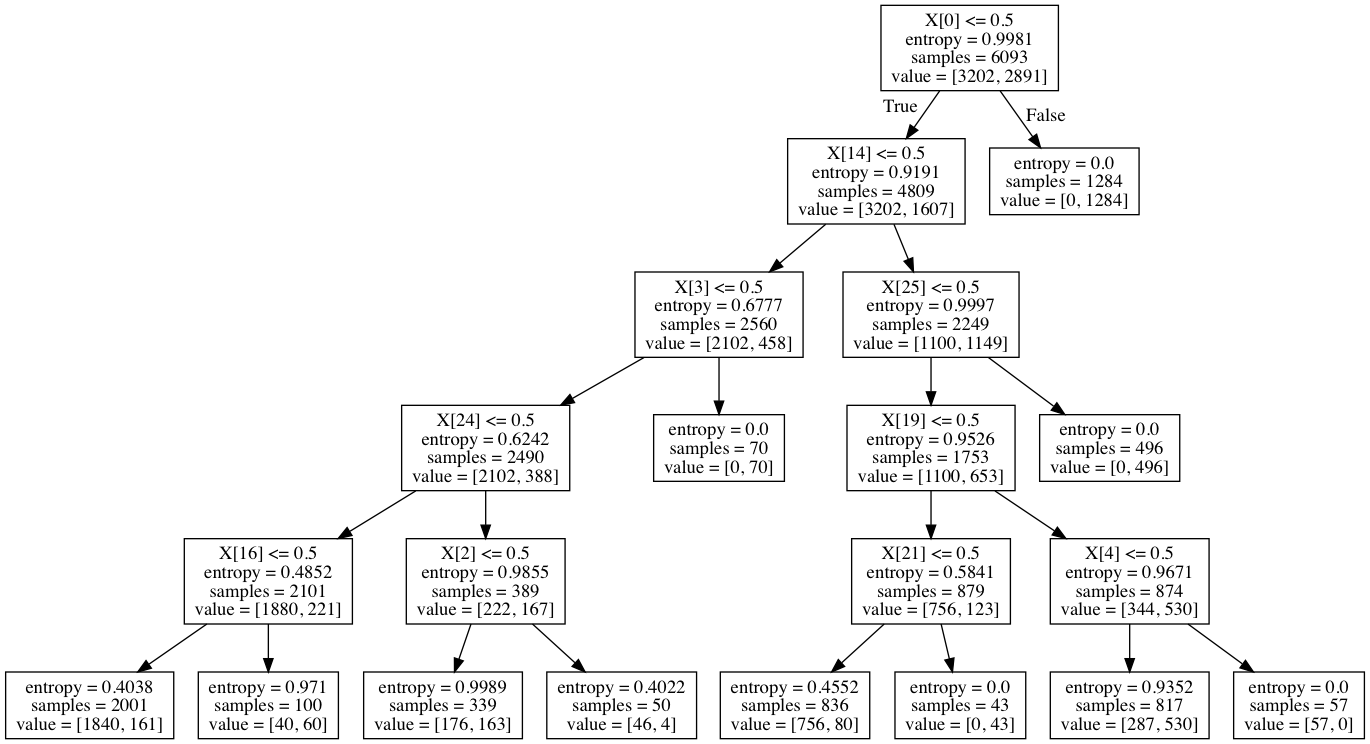

In [91]:
Image(graph.create_png())  

####  <練習問題 1>
分析対象データとして、sklearnのdatasetsからload_breast_cancerを読み込んで、目的変数をcancer.target、説明変数をcancer.dataとして、決定木のモデルを使って、予測と検証を実施してください。

### 8.2.5 k-NN
キーワード：k-NN,怠惰学習,memory-based learning,Look-Alike model

次は、k-NN（k近傍法）について学びます。これは例えば、あるグループAとグループBがあり、その人たちの属性がわかっているとして、どちらのグループかわからない新しい人が来たケースを考えます。ここで、その人がAとBのどちらのグループに属するか考える際に、属性が近い人はAの人が多いのか、B
の人が多いのか多数決で決めて、多い方がそのグループに属していると判断します。kとは、多数決に利用する人数となります。怠惰学習やmemory-based learningとも言われ、訓練データをそのまま覚えて学習する方法です。

以下は、参照URLにあるイメージです。緑の丸がAグループ、青の丸がBグループとして、赤の丸がどちらのグループか判断することを考えます。k=3の場合に、Aグループが近い人が2名、Bグループに近い人が1名なので、この赤の人はAグループに属すると判断します。マーケティングでは、Look-Alikeモデルとも言われ、属性が似ている人たちを集めて判断して、それぞれの属性に合ったアプローチを仕掛けていきます。

![comment](http://www.nag-j.co.jp/nagdmc/img/knn.gif)

参照URL：http://www.nag-j.co.jp/nagdmc/img/knn.gif

k-近傍法はKNeighborsClassifierを使います。ここでは、kをパラメータ化して、1から10まで変化させて、訓練データとテストデータのスコアの変化を見ています。kが小さい時は、このスコアに乖離がありますが、また6を超えたあたりからまた乖離が生じて、過学習になっているのがわかります。

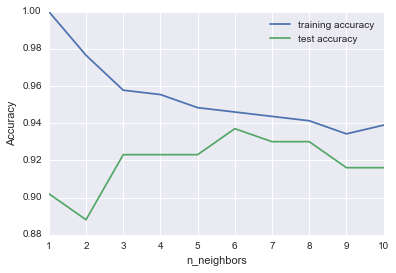

In [238]:
# k-NN 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import  KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy,label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

####  <練習問題 1>
1章のデータを使って、目的となる変数をG3、説明変数となる属性データを以下のようにして、K-NNのkパラメータを変えながら、どのkが最適か考えてみましょう。ただし、目的変数は数値型で、回帰となりますので、KNeighborsRegressorを使ってください。これは、設定されたkの数の平均になります。

### 8.2.6 サポートベクターマシン
キーワード：サポートベクターマシン

サポートベクターマシンは、訓練データにおいて、他クラスの中で最も近い位置にあるサポートベクタを基準として、距離（マージン）が最も大きくなるように境界線を引く方法です。イメージとしては、以下の参照URLがわかりやすいです。以下の2つのグループを分ける境界線は色々とあるのですが、以下のマージンが一番大きくなるように計算します。簡単に言うと、あるグループを分けるときに、いろいろと境界線は引けるけど、お互いからなるべく遠いところに境界線を引いた方がいいよねという考え方です。

![comment](http://www.neuro.sfc.keio.ac.jp/~masato/study/SVM/SVM_1_htm_m614dc45b.gif)

参照URL：http://www.neuro.sfc.keio.ac.jp/~masato/study/SVM/SVM_1_htm_m614dc45b.gif

上記でモデリングし、モジュールはsklearn.svmのLinearSVCを使います。他のコードの役割は前回までと同様です。データはcancerを使います。

In [242]:
# SVM
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

model = LinearSVC()
clf = model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: LinearSVC 0.931924882629
test: LinearSVC 0.93006993007


ここでもスケーリング（標準化）をやったあとにモデリングをしてみます。スコアが改善していることがわかります。

In [92]:
# SVM
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

model = LinearSVC()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

train: LinearSVC 0.985915492958
test: LinearSVC 0.979020979021


####  <練習問題 1>
cancerデータについて、モジュールはsklearn.svmのSVCを使って、cancer.targetを予測するモデルを構築しましょう。パラメーターは、kernel='rbf'を使います。（model = SVC(kernel='rbf', random_state=0, C=2)としてください。）前と同じように、訓練データとテストデータに分けて、標準化してスコアをチェックしてください。

## 8.3 教師なし学習
ゴール：教師なし学習のクラスタリング(非階層と階層)、次元圧縮、パターンマイニングの基本を理解し、簡単な実装ができる

### 8.3.1 クラスタリング
キーワード：非階層型、階層型、k-means、k-means++

ここから、教師なし学習について学びましょう。教師なし学習は、教師あり学習と異なり、アウトプット（Y）やゴールが与えられず、インプットのデータだけを使って、インサイトを見つけ出す方法でした。答えがわかっていない状態で、データの隠れた構造を見つけ出す手法です。前にも触れました通り、人間的な解釈が必要な場面も多く、探索的なデータ分析だと言えるでしょう。まずは、簡単な数値例からクラスタリングを実施していきましょう。なお、このクラスタリングはクラスター分析とも言います。

ここでは、よくクラスタリングで使われる**k-means**法について取り扱っていきます。具体的には、あるデータ（顧客データなど）が与えられて、3つのグループに分けることを考えます。データとしては、属性データ（年齢、ウェブページの訪問回数）があるとして、2次元のグラフを考え、それらをプロットします。次に、その平面の中からどこでも良いので、ランダムに3つ点を取ります。それぞれの点をクラスター1、クラスター2、クラスター3とします。そして、先ほどプロットしたそれぞれのデータについて、3つのクラスターの中から一番近い点を選び、それを自身のクラスター番号とします。すべてのデータについてクラスター番号が決まった後は、それぞれのクラスターの重心（平均）を計算します。その3つの点を再びクラスターの番号として、データがその3点の中で一番近い点を選び、これを繰り返していきます。この中心点が動かなくなったら、そこで終了になります。これがk-meansです。（なお、EMアルゴリズム(期待値ステップと最大化ステップの繰り返し)と関係があります。）

以下の参照URLはイメージです。

![comment](http://insidebigdata.com/wp-content/uploads/2013/12/Clustering.gif)

参照URL：http://insidebigdata.com/wp-content/uploads/2013/12/Clustering.gif

アルゴリズムは上の説明だけだとなかなかイメージしにくいと思いますので、以下のURLで動きが確認できますので、とても参考になります。

参考URL：http://tech.nitoyon.com/ja/blog/2013/11/07/k-means/

他、上のようにセントロイド（平均）ではなく、mediodを計算する方法**k-medoids法**などもあります。これは、k-means法のように中心点が架空の数値をとることはなく、実在する点をとります。また、外れ値による影響が少ないことがメリットとしてあります。興味のある方は、調べてみてください。

では、サンプルとしてk-meansを実行してみましょう。データはsklearnにあるmake_blobsのデータを使います。

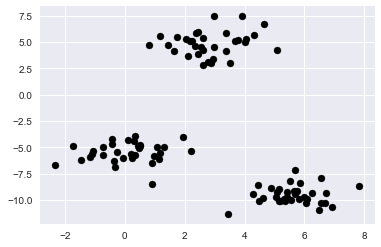

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=10)

plt.scatter(X[:,0],X[:,1],color='black')

KMeansを使います。initをrandom、n_clusters=3と設定しています。

In [28]:
kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(X)

y_pre = kmeans.fit_predict(X)

上の図からどのようにクラスターができるかは予想できそうですが、計算ができたので、早速グラフ化してみましょう。

In [29]:
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pre)]
                       ,axis=1)
merge_data.columns = ["element1","element2","cluster"]

In [30]:
merge_data_cluster0 = merge_data[merge_data["cluster"]==0]
merge_data_cluster1 = merge_data[merge_data["cluster"]==1]
merge_data_cluster2 = merge_data[merge_data["cluster"]==2]

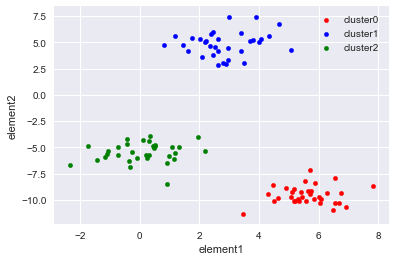

In [31]:
ax =merge_data_cluster0.plot.scatter(x='element1', y='element2', color='red', label='cluster0');
merge_data_cluster1.plot.scatter(x='element1', y='element2', color='blue', label='cluster1',ax=ax);
merge_data_cluster2.plot.scatter(x='element1', y='element2', color='green', label='cluster2',ax=ax);

さて次に、このクラスタリングを一体どうやって活用していくのか、実際のマーケティングのデータを使って見ていきましょう。

扱うデータはとある金融機関のデータで、お客さんが定期預金の申し込みをしたかどうかのデータです。このデータには、キャンペーンの実施状況、お客さんの属性情報などいろいろデータがあります。このデータをクライアントからもらったとして、クライアントから「そもそも私たちのどんなお客さんがいるのかわからない」というお題をいただきました。

教師あり学習アプローチを考えるならば、定期預金をしたかどうかを目的変数にしてモデルを構築したいところですが、今回のように、何か目標となる変数は今のところはっきりしないというケースはビジネスでは多々あります。このような場合や、データの中から潜在的な構造を見つけ出すために、教師なし学習のクラスタリングを実施してみるのも手でしょう。

まずは、対象データを読み込みます。(また、あらかじめディレクトリを作成し、そこへ移動しておきましょう。)

In [46]:
# webからデータを取得したり、zipファイルを扱うためのモジュール
import requests, zipfile
from io import StringIO
import io

# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

データの確認をします。対象となるデータは、bank-full.csvになりますので、それを読み込みます。今回も区切りは「;」なので、気をつけてください。

In [ ]:
ls

In [48]:
banking_c_data = pd.read_csv("bank-full.csv",sep=";")
banking_c_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


参考ですが、以下が属性データです。inputが説明変数となるデータ、outputが目的変数となるデータになりますが、はじめは、目的変数を予測するかどうかは意識しないでおきましょう。

-Input variables:
- ##### bank client data:
1 - age (numeric)   
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
- ##### related with the last contact of the current campaign:   
8 - contact: contact communication type (categorical: 'cellular','telephone')   
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

- ##### other attributes:  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
- ##### social and economic context attributes  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)   
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

-Output variable (desired target):  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

以下よりデータは約4.5万レコードあることがわかります。Unknownはありますが、Nullなどはないようです。

In [49]:
banking_c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


まずは、変数として、age、balance、campaign、previousを使います。

In [50]:
banking_c_data_sub=banking_c_data[['age','balance','campaign','previous']]

クラスタリングも教師あり学習でやったスケーリングを同様に実施することで、大きな変数に引っ張られずに済みます。

In [52]:
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(banking_c_data_sub)
banking_c_data_sub_std = sc.transform(banking_c_data_sub)

それでは、k-meansを実施します。なお、パラメータを省略すると**k-means++**になります。k-means++は、k-meansで初期値で設定する値をなるべく広げて取るように計算する手法で、k-meansよりも安定的な結果が得られます。詳細は参考文献などを読んでください。クラスター数は6にします。

In [61]:
from sklearn.cluster import KMeans

X = banking_c_data_sub_std

# random_state固定
kmeans = KMeans(init='random',n_clusters=6,random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

In [62]:
label_data = pd.DataFrame(labels,columns=["cl_nm"])

ここで、各クラスターに割り当てられた人数を集計してみましょう。

In [63]:
label_data_bycl = label_data.groupby("cl_nm").size()
label_data_bycl

cl_nm
0    24509
1      221
2     2684
3     1380
4    14734
5     1683
dtype: int64

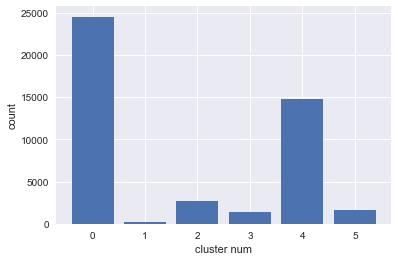

In [64]:
plt.bar([0,1,2,3,4,5],label_data_bycl.values)
# それぞれのラベル
plt.ylabel("count")
plt.xlabel("cluster num")
# グリッドをつける
plt.grid(True)

バランスが悪く見えますが、ここで問題になるのがクラスター数の数をどれだけにすれば良いのかという問題があります。先ほどはいきなり6で決め打ちしました。ここでは**エルボー法**を用いて、クラスター内の歪みを見ながらやる方法を実施します。以下の結果は若干微妙ですが、クラスター数が5〜6付近でエルボーのようになっているため、6でも良さそうです。他の方法として、**シルエット分析(シルエット係数)**などもありますので、興味のある方は参考文献などを見て調べてみてください。

In [65]:
# エルボー法
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init='random',n_init=5,max_iter=100,random_state=0)
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

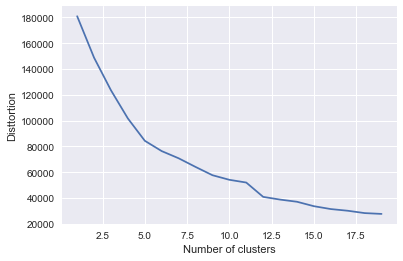

In [66]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

今回は**非階層型**のクラスタリングを実施してきましたが、他、**階層型**のクラスタリングもあります。階層型は計算はsklearn.clusterのAgglomerativeClusteringを使います。今回は詳細は述べませんが、参考文献などを見て勉強してください。実務的には、階層型の方が理解しやいかもしれません。

さて、実務的にはこの結果を解釈していくことが大事になってきますが、ほとんどの機械学習の本にはそこについて触れられていません。クラスター分析はグループ分けをしたら終わりではなく、そこのグループが一体どんなグループなのか、それがわかって次にどんなアクションが取れるのかを求められます。ここでは、その前段階として、クラスタリングをどのように解釈していくか、少し深堀していきましょう。

まず、先ほどのクラスター番号を、元あったデータに紐づけます。

In [67]:
merge_data = pd.concat([banking_c_data,label_data],axis=1)

In [68]:
merge_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cl_nm
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0


次に、例えば、クラスターのそれぞれの年齢層はどうなるかということが気になると思います。以下は、pandasで学んだ分割と、ピボットテーブルを使います。軸はクラスター番号と、年齢です。年齢は基本的に15歳から5歳区切りで、最後は65歳以上100歳未満で区切っています。

In [69]:
#　分割の粒度
absences_bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_result = pd.cut(merge_data.age,absences_bins,right=False)
value_qcut_result = pd.value_counts(qcut_result)
value_qcut_result

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

In [70]:
merge_data_age_cl = pd.concat([merge_data.cl_nm,qcut_result],axis=1)

以下の表はクロス表になります。（行がクラスター番号、列が年齢区切りです。）

In [71]:
cluster_num_age_cross_tb = pd.pivot_table(merge_data_age_cl
                                          , index=['cl_nm'], columns=['age'],aggfunc=lambda x : len(x)
                                          ,fill_value = 0) 
cluster_num_age_cross_tb

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cl_nm,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


ただ、人数だけではわからないので、上の表をベースに、クラスター内においてどの年齢層の割合を計算して、グラフ化しているのが以下になります。

In [72]:
cluster_num_cnt_tb = pd.pivot_table(merge_data, values='previous', index=['cl_nm'],aggfunc=lambda x : len(x))

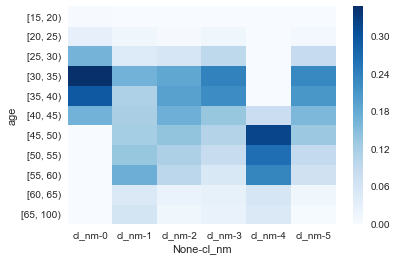

In [74]:
sns.heatmap(pd.DataFrame(cluster_num_age_cross_tb.unstack(1)/cluster_num_cnt_tb,columns=["cl_nm"]).unstack()
            ,cmap='Blues')

上記を見ていると、クラスター番号0の年齢層が30-40前後で固まっていたり、一方クラスター番号4は45-50前後に固まっているのがわかります。

次は、jobについて見てみましょう。

In [75]:
merge_data_job_cl = merge_data[['cl_nm','job']]

In [76]:
cluster_num_job_cross_tb = pd.pivot_table(merge_data_job_cl
                                          , index=['cl_nm'], columns=['job'],aggfunc=lambda x : len(x)
                                          ,fill_value = 0) 
cluster_num_job_cross_tb

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cl_nm,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


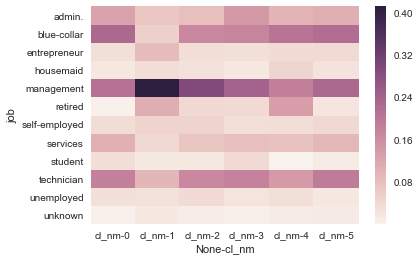

In [77]:
sns.heatmap(pd.DataFrame(cluster_num_job_cross_tb.unstack(1)/cluster_num_cnt_tb,columns=["cl_nm"]).unstack())

上記を見ていると、クラスター番号1が特にマネジメント層の割合が多いのがわかります。一方、クラスタ番号0や4、5はブルーカラー割合が若干多いようです。

まだ他の軸を見る必要などありますが、例えばクラスターの解釈として、クラスター番号0は年齢が30〜40歳が多くブルーカラーの人が多いなどわかってきていますので、ある程度どんな人物なのか浮かび上がってきます（また、ユーザーの人物像を描くための**ペルソナ分析**にも使われたりします。）。このようにクラスタリングを実施し、顧客を色々な視点からセグメンテーションすることで、そのグループにあった提案やサービス戦略を考える材料になります。

以上で、教師なし学習のクラスタリングは終わりです。ここでは、非階層型のみの紹介でしたが、先ほど述べたように階層型、他には確率的にグループ所属を決める**ソフトクラスタリング**などもあります。今までのアプローチは**ハードクラスタリング**といい、それぞれのユーザーに付くクラスター番号は一意でしたが、ソフトクラスタリングは確率的にグループに属するという考え方です。興味がある方はぜひ調べてみてください。

>[参考文献]

>『戦略的データサイエンス入門 ―ビジネスに活かすコンセプトとテクニック』（Foster Provost (著), Tom Fawcett (著), 竹田 正和(監訳) (翻訳), 古畠 敦 (翻訳)、オライリージャパン）

>『データマイニング手法 探索的知識発見編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 江原 淳 (翻訳), 上野 勉 (翻訳), & 2 その他、海文堂出版）

>[参考URL]  

>http://pythondatascience.plavox.info/scikit-learn/クラスタ分析-k-means/  


### 8.3.2 次元圧縮
キーワード：PCA

次は、次元圧縮です。正確には教師なし次元圧縮で、教師あり学習（判別分析）もありますが、ここでは教師なし次元圧縮の主成分分析について学びましょう。データには様々な種類があり、先ほどの金融マーケティングのデータでは、職業だったり、年齢などがありました。

これらの変数と目的である変数との関係性を1つ1つ見ていくことも大切ですが、人の目では確認できない量だったり、それぞれの変数間の関係性なども考慮してみるとなると、どのように見ていけばいいのかわからなくなります。ここで、主成分分析を実施することで、データの情報をできるだけ失わずに、データを圧縮することができます。

まずは、簡単なサンプルデータからその方法を見てみましょう。以下は、2変数のデータ（乱数、シード固定）をプロットした図です。

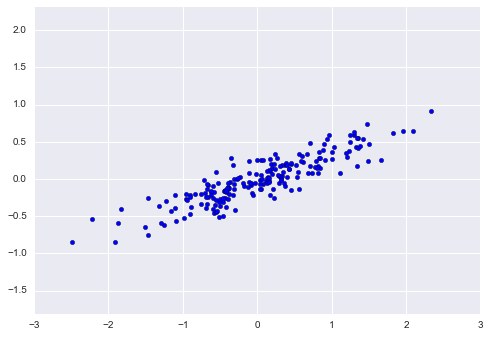

In [449]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng_data = np.random.RandomState(1)
X = np.dot(rng_data.rand(2, 2), rng_data.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

主成分分析はfrom sklearn.decomposition import PCAを使い、以下ではパラメータ（作成する主成分/Principal Componentの数）を2に設定しています。（次元圧縮なので、通常は元の変数の数より小さい値を設定しますが、ここでは手法の説明のため2とします）。pca.fit()で計算を実施しています。

In [450]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

以下は、その実際の計算結果になります。

In [451]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.944  0.329]
 [ 0.329 -0.944]]
[ 0.759  0.018]


数字だけではわかりにくいので、図示してみましょう。以下の矢印が主成分分析の結果の数値になります。分散が最大になるように、お互いに直角になるようにしています。

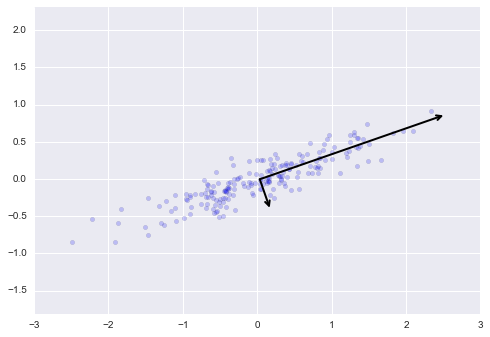

In [452]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

>[参照URL]  

>https://github.com/jakevdp/PythonDataScienceHandbook

図を見て分かるとおり、元の散布図に対して分散が最大になるよう第1成分が作成され、それに直行する形で第2成分が作成されます。各点から第1成分に垂線を下ろした点を考えると、元の2変数が1成分に次元削除されたことになります。

ちなみに、詳細な説明は省きますが、途中の計算には線形代数における固有値や固有ベクトルの概念を使います。この講座でもScipyなどを使って扱いました。これらを理解すると、機械学習を勉強していくうえで後々便利でしょう。

さて、主成分分析の概念としては、上記のようになりますが、では、これが具体的にどのような時に役に立つのでしょうか。以前問題で扱ったcancerデータを使って、その有用性を見ていただきましょう。

以下は、cancerの目的変数（cancer.target）にて、malignant（悪性）とbenign（良性）がそれぞれの属性でどのような分布になっているかのヒストグラムです。ほとんどのグラフについては、malignantとbenignのデータが重なっており、このままですと、これらを見分けるのにどこに境界線（境界値）を引いていいのか難しい状況です。

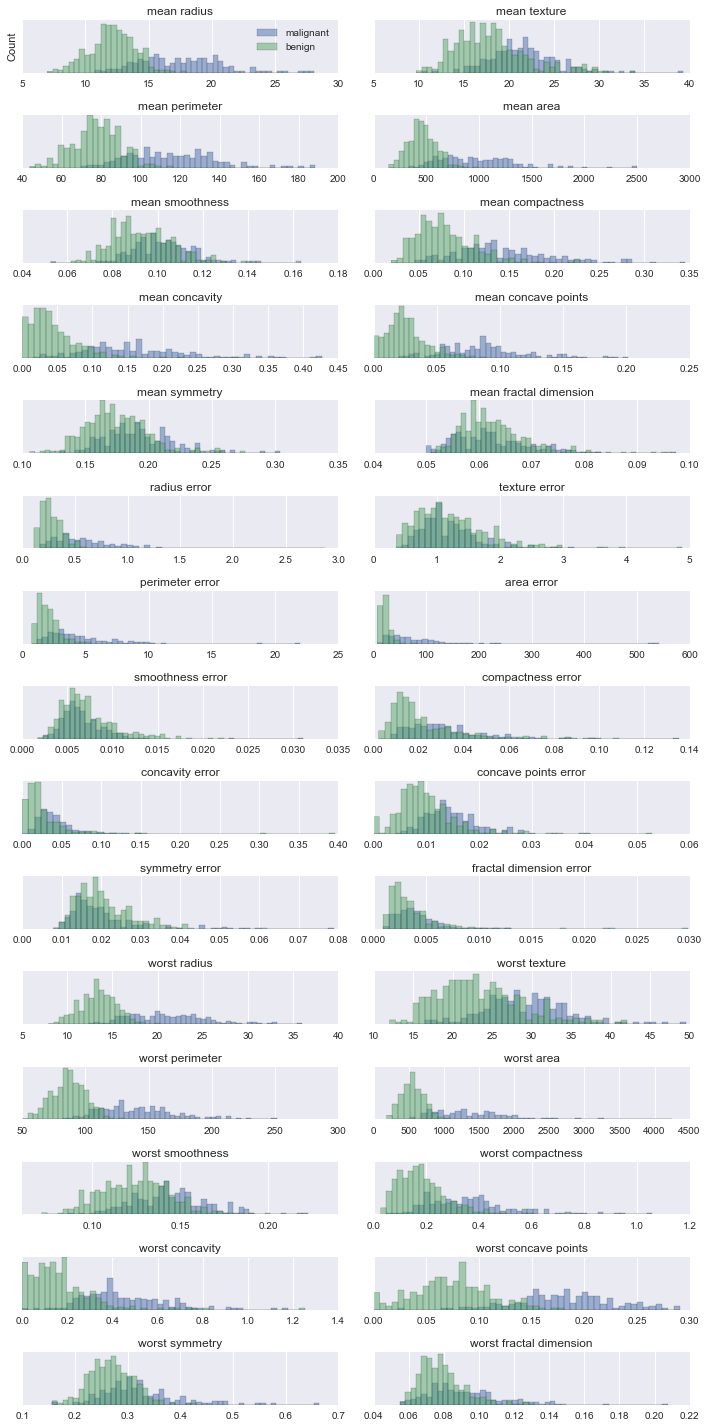

In [453]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15,2,figsize=(10,20))

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_ylabel("Count")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

>[参照文献]  

>『Introduction to Machine Learning with Python』（Andreas C.Muller & Sarah Guido、O'REILLY）

ここで主成分分析を使って、これらの多数ある変数を凝縮してみることにします。まずは、説明変数となるデータのみ対象として、データのスケーリングを実施し、主成分分析をかけます。目的変数はない状態での分析になりますので、もちろん教師なし学習のアプローチです。これらのデータには答え（悪性か良性かのデータ）は入っていません。

作成する成分数（n_component）は2としておきます。

In [13]:
import pandas as pd

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# PCA
from sklearn.decomposition import PCA

cancer = load_breast_cancer()

sc = StandardScaler()
sc.fit(cancer.data)
X_scaled = sc.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

次に、第1成分と第2成分のデータが生成されましたので、それらに対応する目的変数のデータフレームワークをくっつけて、データを作成してみましょう。2章で学んだpandas等のテクニックを使います。

In [14]:
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]),pd.DataFrame(X_pca[:,1]),pd.DataFrame(cancer.target)]
                       ,axis=1)
merge_data.columns = ["first","second","target"]

In [15]:
merge_data_malignant = merge_data[merge_data["target"]==0]
merge_data_benign = merge_data[merge_data["target"]==1]

次にこのデータをプロットして、ラベルとして赤がmalignant（悪性）、青がbenign（良性）とすると、以下のような図になります。

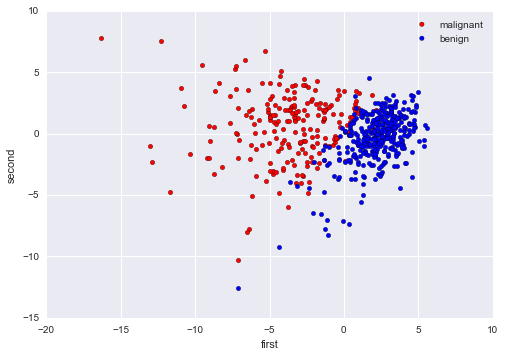

In [16]:
ax =merge_data_malignant.plot.scatter(x='first', y='second', color='red', label='malignant');
merge_data_benign.plot.scatter(x='first', y='second', color='blue', label='benign',ax=ax);

いかがでしょうか。ほぼきれいに分かれていることがわかります。変数が多くて、何を選んだらいいかわからない場合は、この主成分分析をしてみるのも良いでしょう。

### 8.3.3 バスケット分析とアソシエーションルール
キーワード：アソシエーションルール、支持度、確信度、リフト値

さて次は、購買データを対象として、どうやって分析をしていけばよいのか簡単な例を紹介します。データベースの章でも購買データの集計を実施しました。よく例として取り上げられるのが、オムツとビールの購買の組み合わせで、ある家族のお父さんがオムツを買うときについでにビールを買うという話だったり、これは都市伝説だという指摘もありますが、消費者がどんな商品の組み合わせで買うのかは、消費財メーカーもスーパーなどのリテールも関心が高い問題です。

ここでは、4章の総合問題で使った購買データを使います。データの加工方法も途中まで同じです。

In [23]:
import pandas as pd

file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
online_retail_data = pd.ExcelFile(file_url)

# シートを指定する
online_retail_data_table = online_retail_data.parse('Online Retail')
online_retail_data_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


参考ですが、読み込みに時間がかかりますので、あらかじめダウンロードして、それを読み込むようにコーディングしておくことをお勧めします。

In [81]:
# 参考(処理としては上と同じ)
import requests

resp = requests.get(file_url)

#onlineRetail.xlsというファイル名で作成
output = open("onlineRetail.xls", 'wb')
output.write(resp.content)
output.close()

# 以下、上と同じ
online_retail_data = pd.ExcelFile("onlineRetail.xls")

# シートを指定する
online_retail_data_table = online_retail_data.parse('Online Retail')
online_retail_data_table.head()

以下は、4章と同じ処理をしています。

In [24]:
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])
online_retail_data_table.groupby("cancel_flg").size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

InvoiceNoの先頭にCがあるものキャンセル扱いなのでこれは集計対象外とするのでした。また、Aは何の記号が不明なのでこれも対象外として、分析対象は数字であるもの（5で始まっているもの）にします。

In [25]:
online_retail_data_table = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') 
                                                    & (online_retail_data_table.CustomerID.notnull())]

参考で、pandasはピボットテーブルも使えます。（**なお、今回扱うデータが大きく、ilect上ではメモリー不足なるので、参考にみてください**）

In [19]:
invoice_stock_tb = pd.pivot_table(online_retail_data_table, values='Quantity'
                                          , index=['InvoiceNo'], columns=['StockCode'],aggfunc=lambda x : len(x)
                                          ,fill_value = 0) 
invoice_stock_tb.head(5)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


stockCodeのランキングを見てみます。

In [21]:
online_retail_data_table_sc = online_retail_data_table.groupby("StockCode").size()
online_retail_data_table_sc.sort_values(ascending=False).head(5)

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
dtype: int64

上記のTOP5のアイテムを使って、購買データのバスケット分析でよく使われるアソシエーションルールの基本的な概念、支持度、確信度、リフトの算出について見ていきましょう。

#### 支持度

支持度は、すべてのバスケット数（トランザクション数、レシート数）をベースに、ある商品Aとある商品Bの組み合わせ購買がどれくらいあったのかその割合です。


具体的に、商品コード85123Aと商品コード85099Bの支持度を算出してみましょう。

In [461]:
online_retail_data_table_first =online_retail_data_table[online_retail_data_table["StockCode"]=="85123A"]
online_retail_data_table_third =online_retail_data_table[online_retail_data_table["StockCode"]=="85099B"]

In [462]:
merge_one_third = pd.merge(online_retail_data_table_first
                           ,online_retail_data_table_third
                           ,on="InvoiceNo"
                           ,how="inner")

In [463]:
len(merge_one_third.InvoiceNo.unique()) / len(online_retail_data_table.InvoiceNo.unique())

0.014

#### 確信度（信頼度）

確信度は、ある商品Aのトランザクション数をベースに、その商品とある商品Bの組み合わせ購買がどれくらいあったのかその割合です。

商品コード85123Aをベースとして、そのトランザクション数をベースに商品Aと商品Bの組わせトランザクション数を割りましょう。

In [465]:
len(merge_one_third.InvoiceNo.unique()) / len(online_retail_data_table_first.InvoiceNo.unique())

0.127

商品コード85099Bがベースだと以下です。

In [464]:
len(merge_one_third.InvoiceNo.unique()) / len(online_retail_data_table_third.InvoiceNo.unique())

0.158

#### リフト値

すべての購買の中で、ある商品Aが購買される割合をベースにして、ある商品Bが購買された中でそれと商品Aとの組み合わせ購買の割合を分子として算出する方法がリフト値です。若干、意味がわかりにくいですが、要するに、商品Aと商品Bの購買組み合わせが多いのは、単にそれらがもともと売れていたからというのをかき消すために全体の購買での割合で割っています。

以下で、リスト値を計算しています。

In [469]:
x = len(merge_one_third.InvoiceNo.unique()) / len(online_retail_data_table_third.InvoiceNo.unique())
y = len(online_retail_data_table_first.InvoiceNo.unique()) / len(online_retail_data_table.InvoiceNo.unique())

lift = x / y
lift

1.476

絶対的な数値の基準はありませんが、1を超えてくると意味のある数字として捉えられます。

以上で、アソシエーション分析の簡単な紹介は終わります。実際に購買データを分析する際には、いろいろと考慮すべきこと（対象店舗、対象ユーザー、対象期間の絞り込みなど）があったり、また、この分野に関連してアプリオリアルゴリズムなどありますが、購買データ分析で必要になった時に調べてみてください。

これで教師なし学習、および機械学習の基礎は終わりです。お疲れ様でした。総合問題が終わったあとは、この章で少し触れたモデルの検証方法等について学びます。

以下の参考文献は、理論や実装ではなく、ビジネス的な視点でのデータ分析に関する本です。これまで機械学習の手法について色々と学んできましたが、それをビジネスで使うとなると理論的な問題以外にも考えることや、やることが色々とあります。この講座は主に手を動かして実装することが目的なので、あまりビジネス的な注意点は述べませんが、以下の本に書いてあるようなこともとても大事なので、この講座を終えた後に読まれることをお勧めします。

>[参考文献]


>『最強のビッグデータ戦略』（ビル・フランクス (著), 長尾高弘  (翻訳)、日経BP社）

>『データサイエンティストの秘密ノート 35の失敗事例と克服法』（高橋 威知郎  (著), 白石 卓也 (著), 清水 景絵 (著)、SBクリエイティブ）

>『アクセンチュアのプロフェッショナルが教える データ・アナリティクス実践講座』（アクセンチュア アナリティクス (著), 工藤 卓哉  (監修), 保科 学世 (監修)、翔泳社 ）

## 8.4 総合問題

### 8.4.1 総合問題1
分析対象データとして、sklearnのdatasetsからload_iris(アヤメの花)を読み込んで、目的変数をiris.target、説明変数をiris.dataとして、決定木のモデルを使って、予測と検証を実施してください。目的変数のデータはアヤメの花の種類で、以下の参照URLを見てどんな種類があるのかイメージしてください。

In [ ]:
# データの分類
from sklearn.cross_validation import train_test_split

# 分析対象データ
from sklearn.datasets import load_iris

# 決定木
from sklearn.tree import DecisionTreeClassifier

# data
iris = load_iris()

![comment](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png)

参照URL:https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png

### 8.4.2 総合問題2

同じデータ(load_breast_cancer()など)に対して、ロジスティック回帰分析やSVMなど今まで学んだモデルを試し、どれが一番スコアが高いでしょうか？ また、データによって、一番良いスコアが出るモデルは異なりますが、その特徴はどんなものか、考察してください。（これをノーフリーランチといい、どんなデータに対しても、一番良いモデルになるモデルはないということを意味します。）